In [1]:
from classy import Class
import matplotlib.pyplot as plt
from math import pi
import numpy as np

In [2]:
z_pk = 0.0
pk_max = 110.

In [7]:
LambdaCDM = Class()
LambdaCDM.set({
    'omega_b':0.022032,
    'omega_cdm':0.12038,
    'h':0.67556,
    'A_s':2.215e-9,
    'n_s':0.9619,
    'tau_reio':0.0925
})
LambdaCDM.set({
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes',
    'P_k_max_1/Mpc':pk_max
})
LambdaCDM.set({'z_pk':z_pk})
# run class
LambdaCDM.compute()


In [8]:
# get P(k) at redhsift z=0
# kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
kk = np.logspace(-4,np.log10(pk_max),500) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,z_pk)*h**3) # function .pk(k,z)

## Decoupling DM-DR interactions

In [3]:
mycos = Class()
# pass input parameters
mycos.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925})
mycos.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':pk_max})

mycos.set({'f_idm_dr':1., 'xi_idr':0.5, 'a_idm_dr':1.e3, 'nindex_idm_dr':4., 'm_idm':1.0e11})
mycos.set({'z_pk':z_pk})
mycos.set({'z_scale':1.e-8})

# run class
mycos.compute()

In [9]:
mykk = np.logspace(-4,np.log10(pk_max),500) # k in h/Mpc
myPk = [] # P(k) in (Mpc/h)**3
myh = mycos.h() # get reduced Hubble for conversions to 1/Mpc
for k in mykk:
    myPk.append(mycos.pk(k*myh,z_pk)*myh**3) # function .pk(k,z)

## Plotting

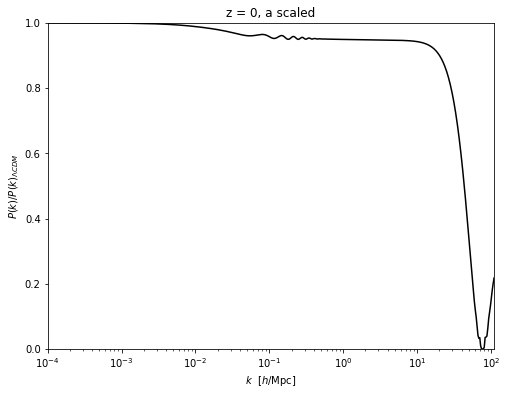

In [12]:
pkratio = [myPk[i]/Pk[i] for i in range(len(Pk))]
# pkratio2 = [myPk2[i]/Pk[i] for i in range(len(Pk))]

plt.figure(2, figsize=(8,6))
plt.xscale('log');plt.yscale('linear');plt.xlim(mykk[0],mykk[-1])
plt.ylim(0,1)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)/P(k)_{\Lambda CDM} \,\,\,\,$')
plt.title('z = 0, a scaled')
plt.plot(mykk,pkratio,'k-', label=r'$\xi = 0.5, a = 1e3$')

plt.show()

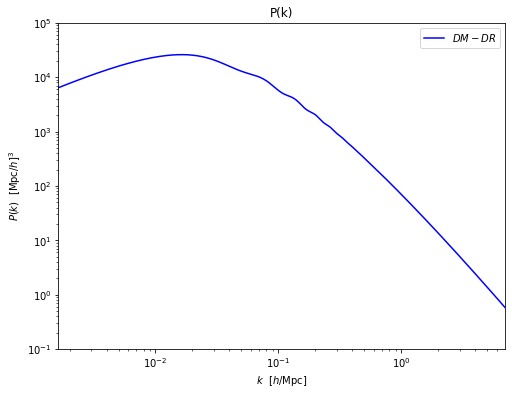

In [21]:
# plot Matter Power Spectrum
plt.figure(2, figsize=(8,6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.title('P(k)')
plt.xlim(mykk[100],mykk[-100])
plt.ylim(1e-1,1e5)
plt.plot(mykk,myPk,'b-', label=r'$DM-DR$')
plt.legend()
plt.show()

In [ ]:
# plt.savefig('../figures/lambda_cdm_all.pdf')

## Varied Decoupling Time

In [ ]:
#Temperature in ev as function of redshift
.235*10.**(-3.)*(1+10**13)
#For range from O(GeV) to O(keV), want redshifts from ~10^6 to ~10^13

z_scale is a factor that controls the decoupling time. Right now, the coupling between DM and DR is parameterized as a_idm_dr*arctan(z_scale*z) where z is the redshift. If z_scale is 1e-alpha, the decoupling starts to occur at z ~ 10**(alpha).

 * Compute with z_scale=1.000000e-06
 * Compute with z_scale=1.778279e-08
 * Compute with z_scale=3.162278e-10
 * Compute with z_scale=5.623413e-12
 * Compute with z_scale=1.000000e-13


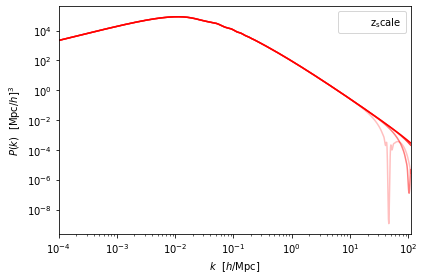

In [9]:
############################################
#
# Varying parameter (others fixed to default)
#
var_name = 'z_scale'
var_array = np.logspace(-6,-13,5) #TBD
var_num = len(var_array)
var_legend = 'z_scale'
var_figname = 'z_scale'
#
#############################################
#
# Fixed settings
#
common_settings = {'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   # other output and precision parameters
                   'P_k_max_1/Mpc':pk_max,
                   # idm_dr parameters
                   'z_pk':z_pk,
                   'f_idm_dr':1.,
                   'xi_idr':0.5,
                   'a_idm_dr':1.e3,
                   'nindex_idm_dr':4.,
                   'm_idm':1.0e11}
                   #'background_verbose':1}  
#
# arrays for output
#
kvec = np.logspace(-4,np.log10(pk_max),1000)
legarray = []
twopi = 2.*pi

#create figures
fig_Pk, ax_Pk = plt.subplots()

# loop over varying parameter values
#
for i,var in enumerate(var_array):
    #
    print(' * Compute with %s=%e'%(var_name,var))
    #
    # deal with colors and legends
    #
#     if i == 0:
#         var_color = 'k'
#         var_alpha = 1.
#         legarray.append(r'ref. $\Lambda CDM$')
#     else:
    var_color = 'r'
    var_alpha = 1.*i/(var_num-1.)
    if i == var_num-1:
        legarray.append(var_legend)  
    #    
    # call CLASS
    #
    M = Class()
    M.set(common_settings)
    M.set({var_name:var})
    M.compute()
    #
    # get Cls
    #
#     clM = M.lensed_cl(2500)
#     ll = clM['ell'][2:]
#     clTT = clM['tt'][2:]
#     clEE = clM['ee'][2:]
#     clPP = clM['pp'][2:]
    #
    # get P(k) for common k values
    #
    pkM = []
    for k in kvec:
        pkM.append(M.pk(k,0.))
    #    
    # plot P(k)
    #
    ax_Pk.loglog(kvec,np.array(pkM),color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot C_l^TT
    #
#     ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
#     #
#     # plot Cl EE 
#     #
#     ax_EE.loglog(ll,clEE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
#     #
#     # plot Cl phiphi
#     #
#     ax_PP.loglog(ll,clPP*ll*(ll+1)*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # reset CLASS
    #
    M.struct_cleanup()
    M.empty()    

ax_Pk.set_xlim([1.e-4,pk_max])
ax_Pk.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
ax_Pk.set_ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
# ax_Pk.legend(legarray)
fig_Pk.tight_layout()
fig_Pk.savefig('../figures/pk_varied_decoupling.pdf')